# Tugas 1 Data Mining
<br>
Muh. Yusuf Syam<br>
H071191044

## 1. Cari dan unduh dataset dari repository Kaggle dan UCI machine learning. (harus berbeda setiap individu mahasiswa)

In [1]:
# Import library

import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# Import file csv
data_drakor= pd.read_csv('top100_kdrama.csv')

# Menampilkan 3 data teratas
data_drakor.head(3)

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2
1,Hospital Playlist,2020,"Mar 12, 2020 - May 28, 2020",Thursday,12,"tvN, Netflix, Netflix, Netflix, Netflix",1 hr. 30 min.,15+ - Teens 15 or older,The stories of people going through their days...,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Friendship, Romance, Life, Medical","Strong Friendship, Doctor, Multiple Mains, Slo...",#2,9.1
2,Flower of Evil,2020,"Jul 29, 2020 - Sep 23, 2020","Wednesday, Thursday",16,tvN,1 hr. 10 min.,15+ - Teens 15 or older,Although Baek Hee Sung is hiding a dark secret...,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...","Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...",#3,9.1


## 2. Ceritakan dataset yang anda ambil dan kira-kira value apa yang anda bisa ambil dari data tersebut

Dataset top100_kdrama.csv adalah dataset yang berisi daftar drama korea dengan rating tertinggi, dengan kata lain merupakan data set dari drama korea terpopuler, dataset ini mempunyai 14 atribut, berikut atribut dan contoh valuenya

In [3]:
data_drakor.iloc[[0]]

,Name,Year of release,Aired Date,Aired On,Number of Episode,Network,Duration,Content Rating,Synopsis,Cast,Genre,Tags,Rank,Rating
0,Move to Heaven,2021,"May 14, 2021",Friday,10,"Netflix, Netflix, Netflix, Netflix",52 min.,18+ Restricted (violence & profanity),Geu Roo is a young autistic man. He works for ...,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Life, Drama, Family","Autism, Father-Son Relationship, Uncle-Nephew ...",#1,9.2


#### Penjelasan masing-masing atribut:<br>
* Name: Judul drama korea
* Year of release: Tahun rilis
* Aired Date: Tanggal penayangan episode pertama-episode akhir
* Number of Episode: Jumlah episode
* Network: Saluran TV yang menayangkan drama tersebut
* Duration: Durasi per episode
* Content Rating: Rating kontent atau target usia penonton, terdiri dari Restricted, Teen dan Child
* Synopsis: Sinopsis drama Korea
* Cast: Daftar pemain
* Genre: Daftar genre
* Tags: Daftar tag
* Rank: Peringkat drama Korea, dari yang tertinggi 0 sampai yang terendah 99
* Rating: Penilaian, terendah 0.0, dan tertinggi 10.0

#### Value yang dapat kita ambil / analisa:<br>
1. Genre drama Korea terpopuler
2. Saluran TV terbaik berdasarkan seberapa banyak drama Korea populer yang dimilikinya
3. Jenis drama Korea yang disukai pemirsa berdasarkan content rating
4. Dll.

## 3. Visualisasikan dataset yang anda ambil secara sederhana.

#### Memvisualisasikan tahun keemasan drama Korea berdasarkan tahun rilis dengan jumlah drama Korea terbanyak

<AxesSubplot:title={'center':'Histogram tahun keemasan drama Korea'}, xlabel='Year of release'>

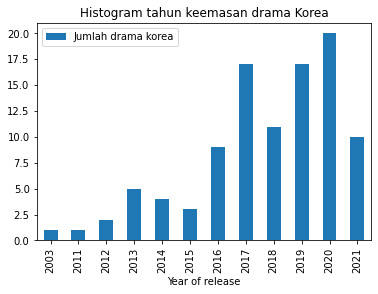

In [4]:
# Membuat fungsi untuk menghitung jumlah drama korea populer setiap tahun
def count_year(x):
    return len(data_drakor[data_drakor['Year of release']==x])

# Membuat kolom tahun rilis sebagai baris/row
data_drakor_by_year= data_drakor.groupby('Year of release').sum()

# Mengaplikasikan fungsi count_year() lalu mengubah tahun rilis menjadi index
data_drakor_year_count= pd.DataFrame(data_drakor_by_year.index).applymap(count_year).set_index(data_drakor_by_year.index)

# Mengubah nama kolom dari 'Year of release' menjadi 'Jumlah drama korea'
data_drakor_year_count= data_drakor_year_count.rename(columns={'Year of release':'Jumlah drama korea'})

# Visualisasi data dalam bentuk bar
data_drakor_year_count.plot(kind='bar', title='Histogram tahun keemasan drama Korea')

#### Memvisualisasikan genre drama korea terpopuler

array([<AxesSubplot:ylabel='sum'>], dtype=object)

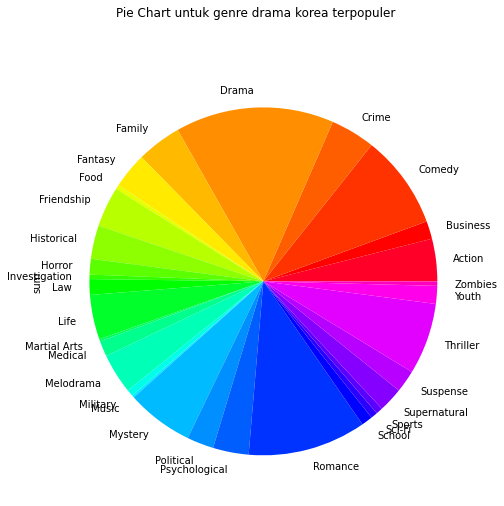

In [5]:
# Membuat fungsi peubah daftar genre yang berbentuk string menjadi list
def parse_genre(x):
    genre_raw= x.split(',')
    genre_list = []
    for genre in genre_raw:
        genre_list.append(genre[:].strip())

    return genre_list

# Mengaplikasikan fungsi parse_genre()
genre_list = list(data_drakor['Genre'].apply(parse_genre))

# Proses membuat daftar genre unik menjadi kolom tambahan
te= TransactionEncoder()
te_gl= te.fit(genre_list).transform(genre_list)
data_drakor_genre_count = pd.DataFrame(te_gl,columns=te.columns_)

# Mengubah nilai boolean(True/False) pada kolom genre baru menjadi integer(1/0)
data_drakor_genre_count= data_drakor_genre_count.astype(np.int8)

# Transpose data, genre menjadi baris/index
data_drakor_genre_count= data_drakor_genre_count.transpose()

# Menjumlahkan genre di setiap kolom dan membuatnya menjadi kolom baru 
data_drakor_genre_count['sum']= data_drakor_genre_count[list(data_drakor_genre_count)].sum(axis=1)

# Menghapus semua kolom hanya menyisakan kolom yang berisi jumlah genre
data_drakor_genre_count= data_drakor_genre_count.iloc[:,-1]

# Visualisasi data dalam bentuk diagram pie dengan color map gist_rainbow
data_drakor_genre_count.plot(kind='pie', subplots=True, figsize=(8,8), cmap='gist_rainbow', title='Pie Chart untuk genre drama korea terpopuler', legend=False)

## 4. Deskripsikan informasi statistik dari data anda secara sederhana

#### - Modus

In [6]:
print('Jumlah episode paling populer: ',data_drakor['Number of Episode'].mode().sum())
print('Tahun rilis paling banyak/populer: ',data_drakor['Year of release'].mode().sum())

Jumlah episode paling populer:  16
Tahun rilis paling banyak/populer:  2020


#### - Mean

In [7]:
print('Rata-rata rating: ',data_drakor['Rating'].mean().sum())
print('Rata-rata jumlah episode: ',data_drakor['Number of Episode'].mean().sum())

Rata-rata rating:  8.703
Rata-rata jumlah episode:  19.53


#### - Deskripsi ringkas

In [8]:
data_drakor.describe()

,Year of release,Number of Episode,Rating
count,100.000000,100.000000,100.000000
mean,2017.680000,19.530000,8.703000
std,2.827999,12.307881,0.178351
min,2003.000000,6.000000,8.500000
25%,2016.750000,16.000000,8.600000
50%,2018.000000,16.000000,8.700000
75%,2020.000000,20.000000,8.800000
max,2021.000000,100.000000,9.200000
